
<h1 align="center"> $\color{red}{\text{Cifar-10 dataset - image classification}}$ </h1> 
<img src="labels.PNG">

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

**0-airplane** 										
**1-automobile**										
**2-bird** 										
**3-cat** 										
**4-deer** 										
**5-dog** 										
**6-frog** 										
**7-horse** 										
**8-ship** 										
**9-truck** 										


### $\color{#A0dd00}{\text{1.Import libraries}}$ 


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras

Using TensorFlow backend.


### $\color{#AAdd00}{\text{2.Load data}}$ 


In [2]:
def load_train_data(n):
    with open('data_batch_'+ str(n), 'rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data']
    Target = batch['labels']
    return features, Target

In [3]:
batch_1, Target_1 = load_train_data(1)
batch_2, Target_2 = load_train_data(2)
batch_3, Target_3 = load_train_data(3)
batch_4, Target_4 = load_train_data(4)
batch_5, Target_5 = load_train_data(5)

In [4]:
print('train batch data shape are',batch_1.shape,batch_2.shape,batch_3.shape,batch_4.shape,batch_5.shape)
print()
print('train label data shape are',len(Target_1),len(Target_2),len(Target_3),len(Target_4),len(Target_5))

train batch data shape are (10000, 3072) (10000, 3072) (10000, 3072) (10000, 3072) (10000, 3072)

train label data shape are 10000 10000 10000 10000 10000


In [5]:
with open('test_batch', 'rb') as file:
    batch = pickle.load(file, encoding='latin1')
X_test = batch['data']
y_test = batch['labels']
print('test batch data and label data shape are',X_test.shape,len(y_test))

test batch data and label data shape are (10000, 3072) 10000


### $\color{#FFdd00}{\text{ 3.Image Plotting}}$ 


In [6]:
def plot_image(batch,labels,num):
    images =batch.reshape((len(batch), 3, 32, 32)).transpose(0,2,3,1)
    dict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
    fig = plt.figure(figsize = (2,2))
    plt.imshow(images[num])
    plt.title(dict[labels[num]])

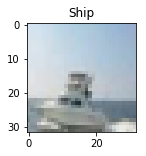

In [7]:
plot_image(batch_1,Target_1,100)

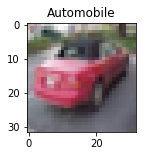

In [8]:
plot_image(batch_2,Target_2,100)

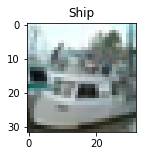

In [9]:
plot_image(batch_3,Target_3,100)

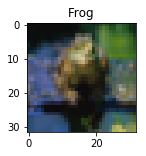

In [10]:
plot_image(batch_4,Target_4,100)

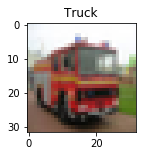

In [11]:
plot_image(batch_5,Target_5,100)

### $\color{#00BBBB}{\text{4. Data Prepatation}}$ 


In [12]:
X_train = np.append(batch_1, batch_2,axis=0)
X_train = np.append(X_train, batch_3,axis=0)
X_train = np.append(X_train, batch_4,axis=0)
X_train = np.append(X_train, batch_5,axis=0)
y_train = np.append(Target_1, Target_2,axis=0)
y_train = np.append(y_train, Target_3,axis=0)
y_train = np.append(y_train, Target_4,axis=0)
y_train = np.append(y_train, Target_5,axis=0)

In [13]:
print(X_train.shape,len(y_train))

(50000, 3072) 50000


In [14]:
X_train = X_train.reshape((len(X_train), 3, 32, 32)).transpose(0,2,3,1)
y_train = np_utils.to_categorical(y_train, 10)

In [15]:
X_test = X_test.reshape((len(X_test), 3, 32, 32)).transpose(0,2,3,1)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
print(X_train.shape,X_test.shape,len(y_train),len(y_test))

(50000, 32, 32, 3) (10000, 32, 32, 3) 50000 10000


In [17]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
X_train= X_train / 255.0
X_test= X_test/ 255.0

# CNN model 

### Conv2D layer

* keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)


**Parameters**

1. Filters 
            
            The filter value depends on  the complexity of the dataset and the depth 
            of neural network.
            
            In this achitecture start with 32 filters.

2. Kerner_size.

            The second required parameter in the Keras Conv2D class is the kernel_size ,a
            2-tuple specifying the width and height of the 2D convolution window.
        
            As the size of the image is 32 x 32 will choose either 1x1 or 3x3 kernel size.

3. Strides.
        
            The strides  parameter is a 2-tuple of integers, specifying the 'step' of the
            convolution along the x and y axis of the input volume.
          
            The strides  value defaults to (1, 1) as I use the same.

4. Padding.
           
            To preserve the spatial dimensions of the volume, i use "same"  for the 
            padding.

5. Activation

            The activation  parameter  helps keep code cleaner and won't have an impact 
            on the performance of Convolutional Neural Network.

           
6. kernel_initializer

            The kernel_initializer  defaults to glorot_uniform , the Xavier Glorot 
            uniform initialization method, which is perfectly fine for the majority of 
            tasks; however, for deeper neural networks want to use  'he_normal' if 
            network has a large number of parameters.

            
7. The kernel_regularizer , bias_regularizer , and activity_regularizer   
                
             Controls The type and amount of regularization method applied to the Conv2D 
             layer.

             Applying regularization helps to:

                Reduce the effects of overfitting
                Increase the ability of your model to generalize

          
8. Rest all parameters are kept as default.


# MaxPooling2D

Max pooling operation for spatial data.

* keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)




##  Model 1 
#### Lets check the performance with below parameters
1. Initial filter with 64
2. kernel size 3x3 
3. activation - Relu
4. Kernel_initializer - he_normal
5. kerner_regularizer - 0.001
6. 5 conv2D layers, 3 maxpooling2D, 2 dense or fully connected layers, one flatten
7. optimizer SGD
9. loss - cross entropy
10. Metrics - accuracy
11. batch_size = 32
12. epochs -10
11. No cross validation 

In [18]:
# Lets built a model with conv2d layers
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv

In [19]:
epochs = 10
sgd = SGD(lr=1e-2, momentum=0.9, decay=1e-2/epochs)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=epochs,batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 360s 7ms/step - loss: 2.2050 - acc: 0.3811
Epoch 2/10
50000/50000 [==============================] - 247s 5ms/step - loss: 1.6955 - acc: 0.5551
Epoch 3/10
50000/50000 [==============================] - 259s 5ms/step - loss: 1.4814 - acc: 0.6193 5s - loss: 1.4829 - acc - ETA: 3s - loss: 1.4827  - ETA: 1s - loss: 1.4822 - 
Epoch 4/10
50000/50000 [==============================] - 260s 5ms/step - loss: 1.3625 - acc: 0.6529 5s - loss: 1.3638 - acc: 0 - ETA: 
Epoch 5/10
50000/50000 [==============================] - 264s 5ms/step - loss: 1.2680 - acc: 0.6814
Epoch 6/10
50000/50000 [==============================] - 269s 5ms/step - loss: 1.1962 - acc: 0.7037
Epoch 7/10
50000/50000 [==============================] - 277s 6ms/step - loss: 1.1463 - acc: 0.7171
Epoch 8/10
50000/50000 [==============================] - 307s 6ms/step - loss: 1.0962 - acc: 0.7328
Epoch 9/10
50000/50000 [=======

In [20]:
test_loss,test_acc = model.evaluate(X_test,y_test)
test_acc

10000/10000 [==============================] - 18s 2ms/step


0.7106

## Observation 

The train accuracy for the above model with 10 epochs is 75.5%
The test accuracy is 71%  so if the epochs increased accuracy will vary

The difference in accuracy for train and test is approx 4% it may change with other unknown pictures

# model 2
#### Lets check the performance  by changing initial filter in increasing order with powers of 2
1. Initial filter with 32
2. kernel size 3x3 
3. activation - Relu
4. Kernel_initializer - he_normal
5. kerner_regularizer - 0.001
6. 5 conv2D layers, 3 maxpooling2D, 2 dense or fully connected layers, one flatten
7. optimizer SGD
9. loss - cross entropy
10. Metrics - accuracy
11. batch_size = 32
12. epochs -10
11. No cross validation 

In [22]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model2.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [23]:
epochs = 10
sgd = SGD(lr=1e-2, momentum=0.9, decay=1e-2/epochs)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train,y_train,epochs=epochs,batch_size = 32)

Epoch 1/10
50000/50000 [==============================] - 103s 2ms/step - loss: 2.2591 - acc: 0.3634
Epoch 2/10
50000/50000 [==============================] - 117s 2ms/step - loss: 1.7776 - acc: 0.5163
Epoch 3/10
50000/50000 [==============================] - 116s 2ms/step - loss: 1.5704 - acc: 0.5816
Epoch 4/10
50000/50000 [==============================] - 126s 3ms/step - loss: 1.4424 - acc: 0.6203
Epoch 5/10
50000/50000 [==============================] - 131s 3ms/step - loss: 1.3423 - acc: 0.6529
Epoch 6/10
50000/50000 [==============================] - 136s 3ms/step - loss: 1.2669 - acc: 0.6765
Epoch 7/10
50000/50000 [==============================] - 129s 3ms/step - loss: 1.2028 - acc: 0.6969 2s - loss: 1.2023 - - ETA: 1s - los
Epoch 8/10
50000/50000 [==============================] - 129s 3ms/step - loss: 1.1511 - acc: 0.7121 0s - loss: 1.1509 - acc
Epoch 9/10
50000/50000 [==============================] - 130s 3ms/step - loss: 1.1018 - acc: 0.7280
Epoch 10/10
50000/50000 [======

In [24]:
test_loss,test_acc = model2.evaluate(X_test,y_test)
test_acc

10000/10000 [==============================] - 11s 1ms/step


0.6629

# Observation 
The above model with filters changing in increasing order decreased the accuracy  by 2% and with less computation
model 2 reduced test accuracy 1% data from  model 1


# Model 3
Change in kernel shape 1 X 1

In [25]:
model3 = Sequential()
model3.add(Conv2D(32, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model3.add(Conv2D(64, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        1056      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        2112      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        4160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         8320      
__________

In [26]:
epochs = 10
sgd = SGD(lr=1e-2, momentum=0.9, decay=1e-2/epochs)
model3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train,y_train,epochs=epochs,batch_size = 32)

Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 2.3842 - acc: 0.3185
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.9200 - acc: 0.4613
Epoch 3/10
50000/50000 [==============================] - 68s 1ms/step - loss: 1.7791 - acc: 0.4967
Epoch 4/10
50000/50000 [==============================] - 68s 1ms/step - loss: 1.6963 - acc: 0.5166
Epoch 5/10
50000/50000 [==============================] - 57s 1ms/step - loss: 1.6320 - acc: 0.5322
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5832 - acc: 0.5456
Epoch 7/10
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5437 - acc: 0.5575
Epoch 8/10
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5086 - acc: 0.5667
Epoch 9/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.4801 - acc: 0.5759
Epoch 10/10
50000/50000 [==============================] - 53s 1ms/step - loss: 1.4554 - acc: 0.5816

In [27]:
test_loss,test_acc = model3.evaluate(X_test,y_test)
test_acc

10000/10000 [==============================] - 5s 477us/step


0.5748

# Observation
 By reducing kernel size the train accuracy droped by almost 17%
But the difference between the test and train is only 2% 
it requires only less computation compare to above models
 ,so kernel size 1x1 is not a good choice

# Model -4


In [28]:
model4 = Sequential()
model4.add(Conv2D(64, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
model4.add(Conv2D(64, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model4.add(Conv2D(64, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (1, 1), activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        4160      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        4160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)          4160      
__________

In [29]:
epochs = 10
sgd = SGD(lr=1e-2, momentum=0.9, decay=1e-2/epochs)
model4.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(X_train,y_train,epochs=epochs,batch_size = 32)

Epoch 1/10
50000/50000 [==============================] - 78s 2ms/step - loss: 2.2423 - acc: 0.3753
Epoch 2/10
50000/50000 [==============================] - 78s 2ms/step - loss: 1.8545 - acc: 0.4848
Epoch 3/10
50000/50000 [==============================] - 76s 2ms/step - loss: 1.7188 - acc: 0.5180
Epoch 4/10
50000/50000 [==============================] - 77s 2ms/step - loss: 1.6352 - acc: 0.5387
Epoch 5/10
50000/50000 [==============================] - 76s 2ms/step - loss: 1.5727 - acc: 0.5562
Epoch 6/10
50000/50000 [==============================] - 77s 2ms/step - loss: 1.5296 - acc: 0.5650
Epoch 7/10
50000/50000 [==============================] - 77s 2ms/step - loss: 1.4938 - acc: 0.5761
Epoch 8/10
50000/50000 [==============================] - 76s 2ms/step - loss: 1.4638 - acc: 0.5816
Epoch 9/10
50000/50000 [==============================] - 77s 2ms/step - loss: 1.4401 - acc: 0.5866
Epoch 10/10
50000/50000 [==============================] - 78s 2ms/step - loss: 1.4182 - acc: 0.5948

In [30]:
test_loss,test_acc = model4.evaluate(X_test,y_test)
test_acc

10000/10000 [==============================] - 7s 702us/step


0.5812

# Observation 

By the above four model kernel size are more important than the filters 
so to choose the right kernels and filters are much important 
Two important things will consider computation , overfitting while modeling

* So by the above four model we consider model 1&2  to for futher model analysis